<h1>Метод квадратного корня</h1>

Рассмотрим систему ЛАУ: $Ax=f$, $\det (A)\neq0$.<br>
$a_{ij}=\frac{1}{i+j+11},$ $i,j=1,\ldots,n;$ $n\in\{4,6,8,10,12\}$,
$f = a + (b-a)\cdot random,$ $a,b\:-$ произвольные числа $a<b$.

Положим $a = 0,\:b = 1.$


Зададим матрицу $A$ и вектор $f$:

In [1]:
import numpy as np
from random import random, seed


def get_matrix(n: int):
    seed()
    return np.array([[1 / (i + j + 11) for i in range(1, n + 1)] for j in range(1, n + 1)])


def get_f(n: int, a = 0, b = 1):
    return np.array([a + b * (b - a) * random() for _ in range(n)])

Функция ``sqroot_method($A$)`` выполняет разложение матрицы $A$: она возвращает матрицу $A$ и матрицу $D$.

$A=S^tDS$, где $D\:-$ диагональная матрица, на диагонали которой находятся только числа из
множества $\{−1,\:1\}$.

<b>Расчетные формулы разложения:</b><br>
диагональные элементы:<br>
$d_{ii}=sign\left(a_{ii}-\sum\limits_{k=1}^{i-1}|s_{ki}|^2d_{kk}\right);$<br>
$s_{ii}=\sqrt{\left|a_{ii}-\sum\limits_{k=1}^{i-1}|s_{ki}|^2d_{kk}\right|};$<br>
при $i<j:$<br>
$s_{ij}=\dfrac{a_{ij}-\sum\limits_{k=1}^{i-1}s_{ik}d_{kk}s_{kj}}{s_{ii}d_{ii}}.$

In [2]:
def sqroot_method(m: np.ndarray):
    m = m.copy()
    s = np.zeros_like(m)
    d = np.zeros(len(m))
    s[0, 0] = np.sqrt(np.abs(m[0, 0]))
    d[0] = np.sign(m[0, 0])

    for i in range(len(m)):
        w = m[i, i]
        for k in range(i):
            w -= d[k] * s[k, i] ** 2
        d[i] = np.sign(w)
        s[i, i] = np.sqrt(np.abs(w))

        for j in range(i, len(m)):
            w = m[i, j]
            for k in range(i):
                w -= d[k] * s[k, i] * s[k, j]
            s[i, j] = w / (d[i] * s[i, i])
    return s, d

Функция``solve(A, f)``решает ЛАУ $Ax=f$ с помощью разложения матрицы $A=S^tDS$ последовательным
решением двух систем ЛАУ с треугольными матрицами: $S^tDy=f$, $Sx=y$.

Вектор $y$ находится следующим образом:

$\begin{cases}y_1=\dfrac{f_1}{s_{11}d_{11}},\\ y_i=\dfrac{f_i-\sum\limits_{j=1}^{i-1}s_{ji}y_jd_{jj}}{s_{ii}d_{ii}},
\:i=2,\ldots,n.\end{cases}$

Затем искомый вектор $x:$

$\begin{cases}x_n=\dfrac{y_n}{s_{nn}},\\ x_i=\dfrac{y_i-\sum\limits_{j=i+1}^ns_{ij}x_j}{s_{ii}},
\:i=n-1,\ldots,1.\end{cases}$


In [3]:
def solve(m: np.ndarray, v: np.ndarray):
    m = m.copy()
    v = v.copy()
    s, d = sqroot_method(m)

    y = np.zeros_like(v)
    for i in range(len(m)):
        w = v[i]

        for j in range(i):
            w -= s[j, i] * y[j] * d[j]
        y[i] = w / (s[i, i] * d[i])

    x = np.zeros_like(v)
    for i in range(len(m) - 1, -1, -1):
        w = y[i]

        for j in range(i + 1, len(m)):
            w -= s[i, j] * x[j]
        x[i] = w / s[i, i]
    return x

Теперь, имея все необходимые функции, можем решить ЛАУ. Для каждого $n$
будем решать систему с помощью написанной и встроенной функции. Также найдём невязку $||r|| = ||f-Ax||$.

In [4]:
numbers = [i for i in range(4, 13, 2)]
residues = []
for n in numbers:
    matrix = get_matrix(n)
    f = get_f(n)
    print(f"\nn = {n}\n")
    print(f"Матрица A:\n{matrix}\n")
    print(f"Вектор f:\n{f}\n")
    x = solve(matrix, f)
    r = np.linalg.norm(f-np.dot(matrix, x))
    rel = r / np.linalg.norm(f)
    residues.append(rel)
    print(f"Невязка: {r}\n")
    print(f"Относительная норма невязки: {rel}\n")
    print(f"Решение с помощью написанной функции:\n{x}\n")
    print(f"Решение с помощью встроенной функции:\n{np.linalg.solve(matrix, f)}\n")


n = 4

Матрица A:
[[0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.07142857 0.06666667 0.0625     0.05882353]
 [0.06666667 0.0625     0.05882353 0.05555556]
 [0.0625     0.05882353 0.05555556 0.05263158]]

Вектор f:
[0.35919298 0.70146266 0.85106601 0.93819692]

Невязка: 1.8706628157095723e-11

Относительная норма невязки: 1.2539271909213618e-11

Решение с помощью написанной функции:
[ -404323.76370784  1463518.67939467 -1747145.63779163   688664.2319215 ]

Решение с помощью встроенной функции:
[ -404323.76335635  1463518.67810433 -1747145.63623275   688664.23130076]


n = 6

Матрица A:
[[0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556]
 [0.07142857 0.06666667 0.0625     0.05882353 0.05555556 0.05263158]
 [0.06666667 0.0625     0.05882353 0.05555556 0.05263158 0.05      ]
 [0.0625     0.05882353 0.05555556 0.05263158 0.05       0.04761905]
 [0.05882353 0.05555556 0.05263158 0.05       0.04761905 0.04545455]
 [0.05555556 0.05263158 0.05       0.04761905 0.04545455 0

Построим график зависимости относительной нормы невязки: $\frac{||r||}{||f||}=
\frac{||f-Ax||}{||f||}$ от размера матрицы $n.$

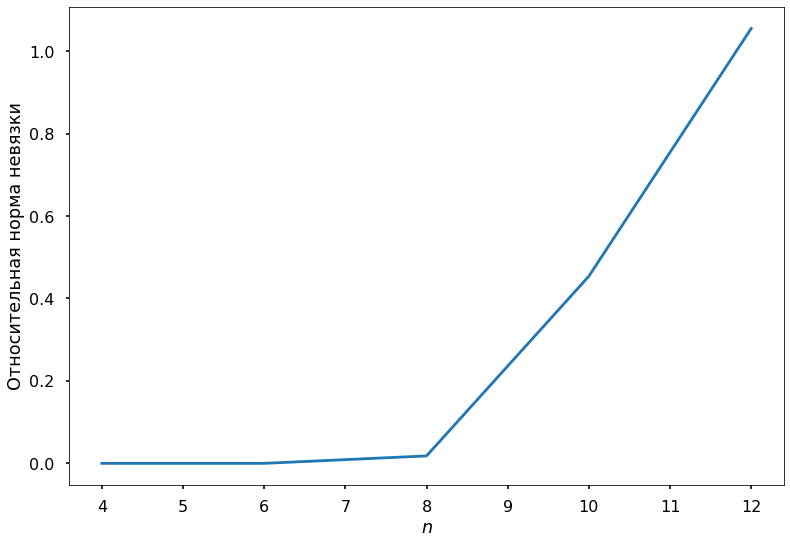

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig, ax = plt.subplots()
ax.plot(numbers, residues)
ax.set_ylabel('Относительная норма невязки')
ax.set_xlabel('$n$')
plt.show()